<a href="https://colab.research.google.com/github/ask350/Test/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering

KMeans

In [1]:
%pip install yellowbrick

# Step 1 - Read the dataset

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Mall_Customers.csv'
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Categorise similat customers based on Income, Spending

In [3]:
## Step 2- perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Income,0
Spending,0


In [6]:
df.duplicated().sum()

0

## Step 3 - Seperate X values
There is no target feature in clustering (Unsupervised Machine Learning)

In [7]:
X = df[["Income", "Spending"]]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Step 4 - Apply preprocessing on X

In [8]:
X.dtypes

,0
Income,int64
Spending,int64


In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform = "pandas")

In [11]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


## Decide number of clusters from yellowbrick package

In [12]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

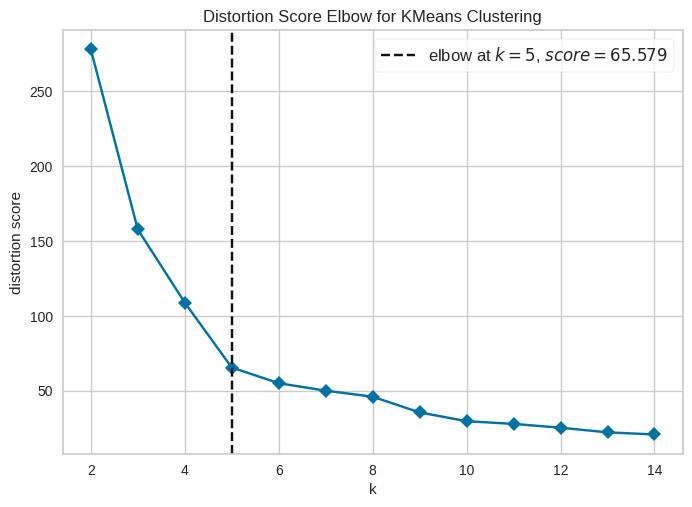

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
bqse_model = KMeans()
visualizer = KElbowVisualizer(bqse_model, k=(2, 15), timings=False)
visualizer.fit(X_pre)
visualizer.show()

## Based on above elbow method we can choose 5 clusters

## Build final KMeans model

In [14]:
best_km = KMeans(n_clusters=5)
best_km.fit(X_pre)

KMeans(n_clusters=5)

In [15]:
X2 = X.copy()

In [16]:
X2

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [22]:
X2["Label"] = best_km.labels_
X2.head()

,Income,Spending,Lable,Label
0,15,39,0,0
1,15,81,4,4
2,16,6,0,0
3,16,77,4,4
4,17,40,0,0


### in labels 0 to 4 clusters will be there

In [23]:
X2.query("Label == 0")

,Income,Spending,Lable,Label
0,15,39,0,0
2,16,6,0,0
4,17,40,0,0
6,18,6,0,0
8,19,3,0,0
...,...,...,...,...
118,67,43,0,0
119,67,57,0,0
120,67,56,0,0
121,67,40,0,0


In [24]:
for i in range(5):
  print(f"cluster Number : {i}")
  c = X2.query(f"Label == {i}")
  display(c)
  print("\n======================================================\n")

cluster Number : 0


,Income,Spending,Lable,Label
0,15,39,0,0
2,16,6,0,0
4,17,40,0,0
6,18,6,0,0
8,19,3,0,0
...,...,...,...,...
118,67,43,0,0
119,67,57,0,0
120,67,56,0,0
121,67,40,0,0




cluster Number : 1


,Income,Spending,Lable,Label
123,69,91,1,1
125,70,77,1,1
127,71,95,1,1
129,71,75,1,1
131,71,75,1,1
133,72,71,1,1
135,73,88,1,1
137,73,73,1,1
139,74,72,1,1
141,75,93,1,1




cluster Number : 2


,Income,Spending,Lable,Label
180,97,32,2,2
182,98,15,2,2
184,99,39,2,2
186,101,24,2,2
188,103,17,2,2
190,103,23,2,2
192,113,8,2,2
194,120,16,2,2
196,126,28,2,2
198,137,18,2,2




cluster Number : 3


,Income,Spending,Lable,Label
124,70,29,3,3
126,71,35,3,3
128,71,11,3,3
130,71,9,3,3
132,72,34,3,3
134,73,5,3,3
136,73,7,3,3
138,74,10,3,3
140,75,5,3,3
142,76,40,3,3




cluster Number : 4


,Income,Spending,Lable,Label
1,15,81,4,4
3,16,77,4,4
5,17,76,4,4
7,18,94,4,4
9,19,72,4,4
11,19,99,4,4
13,20,77,4,4
15,20,79,4,4
17,21,66,4,4
19,23,98,4,4


In [25]:
X2.to_csv("KMeansResults.csv", index=False)

## Visualising the clusters

<Axes: xlabel='Income', ylabel='Spending'>

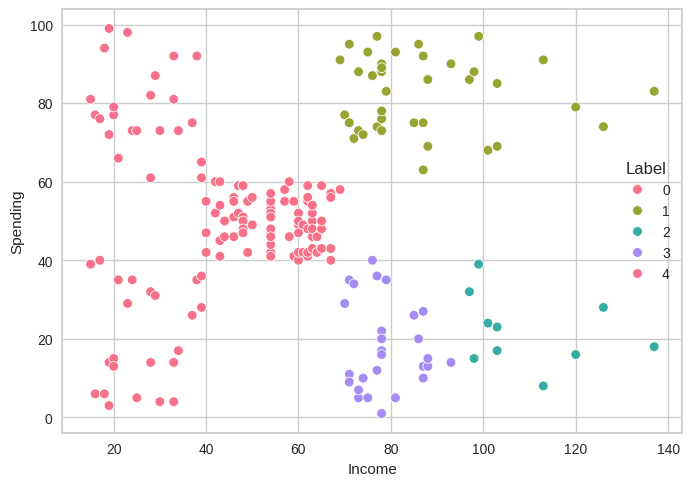

In [28]:
import seaborn as sns
sns.scatterplot(data=X2, x="Income", y="Spending", hue="Label", palette="husl")

## 2. Agglomerative Clustering (Bottom-Up approach)

In [29]:
from sklearn.cluster import AgglomerativeClustering

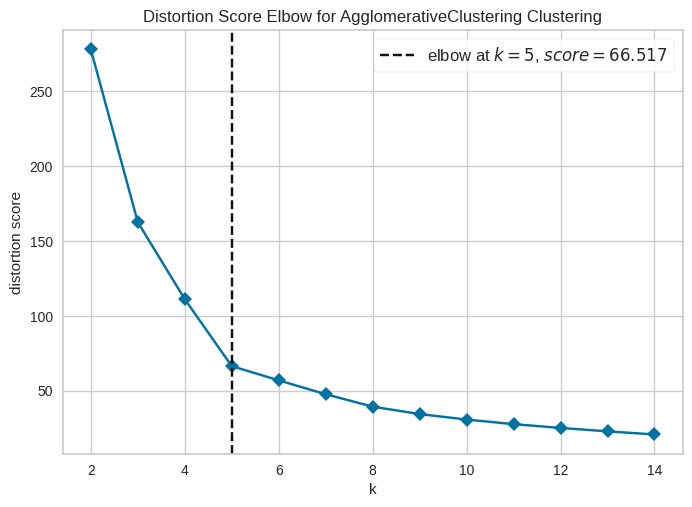

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
model_agc = AgglomerativeClustering()
visualizer2 = KElbowVisualizer(model_agc, k=(2, 15), timings=False)
visualizer2.fit(X_pre)
visualizer2.show()

### Lower the distortion score better the model

## Based on above i can use n_clusters=5

In [32]:
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [33]:
best_agc = AgglomerativeClustering(n_clusters=5)
best_agc.fit(X_pre)

AgglomerativeClustering(n_clusters=5)

In [34]:
X3 = X.copy()
X3.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [35]:
X3["Label"] = best_agc.labels_
X3.head()

,Income,Spending,Label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [36]:
for i in range(5):
  print(f"cluster Number : {i}")
  c = X3.query(f"Label == {i}")
  display(c)
  print("\n======================================================\n")


cluster Number : 0


,Income,Spending,Label
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0
140,75,5,0
144,77,12,0
148,78,22,0
150,78,17,0
152,78,20,0




cluster Number : 1


,Income,Spending,Label
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1




cluster Number : 2


,Income,Spending,Label
43,39,61,2
45,39,65,2
46,40,55,2
47,40,47,2
48,40,42,2
...,...,...,...
126,71,35,2
132,72,34,2
142,76,40,2
146,77,36,2




cluster Number : 3


,Income,Spending,Label
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3




cluster Number : 4


,Income,Spending,Label
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


In [37]:
X3.to_csv("AGCResults.csv", index=False)

<Axes: xlabel='Income', ylabel='Spending'>

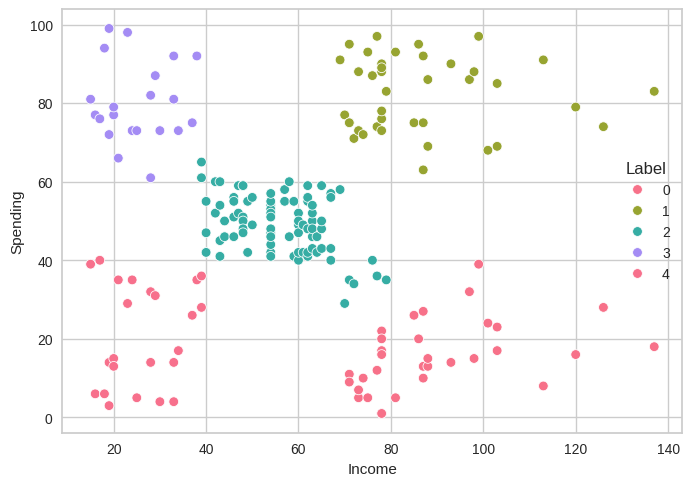

In [40]:
sns.scatterplot(data=X3, x="Income", y="Spending", hue="Label", palette="husl")